In [15]:
import cv2
import matplotlib.pyplot as plt
from mask_inpaint import generate_mask

# Load the image and preprocess it
image = cv2.imread("image.png")  # Read as BGR
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

mask = generate_mask(image)

image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

c:\Users\yasir\Desktop\image_project\old_photo_restoration
Mask generation completed successfully.
initializing the dataloader
model weights loaded
directory of testing image: c:\Users\yasir\Desktop\image_project\old_photo_restoration\mask_generation\input
processing image.png



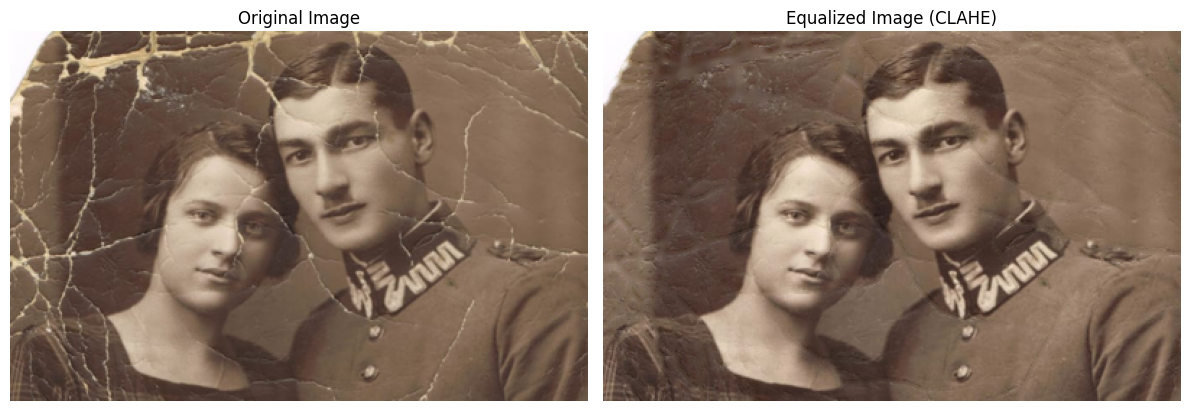

In [21]:
# Convert to YUV color space
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8, 8))

# Apply CLAHE to the Y channel
image_yuv[:, :, 0] = clahe.apply(image_yuv[:, :, 0])

# Convert back to RGB color space
image_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Plot the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

# CLAHE equalized image
plt.subplot(1, 2, 2)
plt.title("Equalized Image (CLAHE)")
plt.imshow(image_equalized)
plt.axis('off')

plt.tight_layout()
plt.show()

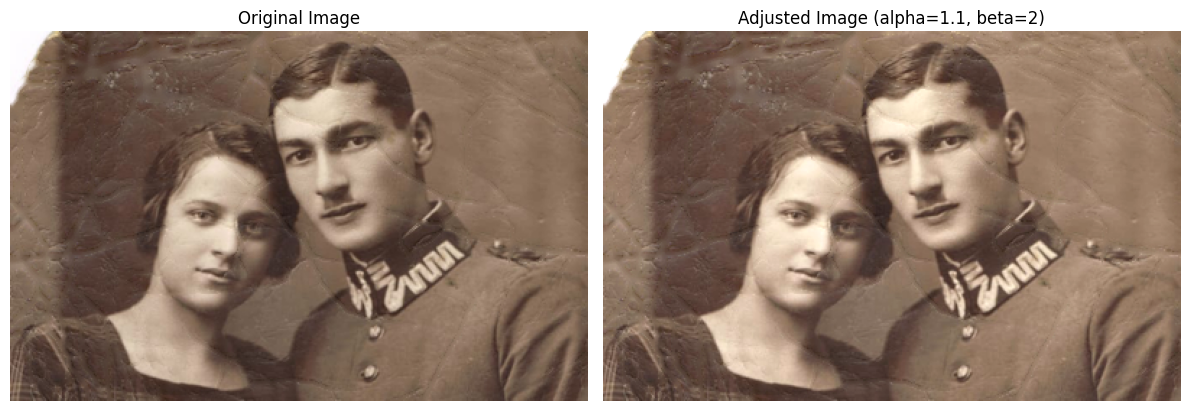

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to adjust brightness and contrast
def adjust_brightness_contrast(image, alpha, beta):
    """
    Adjust brightness and contrast of an image.

    Parameters:
    - image: Input image (NumPy array).
    - alpha: Contrast control (1.0-3.0).
    - beta: Brightness control (0-100).

    Returns:
    - Adjusted image (NumPy array).
    """
    # Apply the formula: new_image = alpha * image + beta
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

# Load the input image
# image = cv2.imread("image.png")
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Test different brightness and contrast values
alpha = 1.1  # Contrast control
beta = 2    # Brightness control

# Adjust the image
adjusted_image = adjust_brightness_contrast(image_equalized, alpha, beta)

# Plot the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_equalized)
plt.axis('off')

# Adjusted image
plt.subplot(1, 2, 2)
plt.title(f"Adjusted Image (alpha={alpha}, beta={beta})")
plt.imshow(adjusted_image)
plt.axis('off')

plt.tight_layout()
plt.show()
